# This Jupyter Notebook mainly looks into exploratory data analysis and data visualisation on the cleaned OSMI Mental Health dataset.

### Some features not really needed for data visualisation are separated from the cleaned dataset.

In [1]:
import pandas as pd  # data processing, CSV file I/O
survey = pd.read_csv('cleanedDatasets/OSMIcleaned.csv')

notes = survey[['Disorder Notes', 'Describe Past Experience']]
survey.drop(notes, axis =1, inplace=True)

### All warnings are supressed to produce more concise output.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### A new color palette is defined and set for data visualisation. A simple function is defined to quicky view any figure with the desired properties.

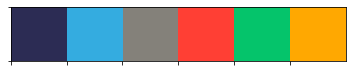

In [3]:
flatUI = ["#2c2c54", "#34ace0", "#84817a", "#ff3f34", "#05c46b", "#ffa801"]
sns.set_palette(flatUI)
sns.palplot(sns.color_palette())
plt.show()

def showFigure(fig, x=16, y=4):
    fig = plt.gcf()
    fig.set_size_inches(x, y)
    plt.show()

### The distribution of data with respect to age can be seen below. 

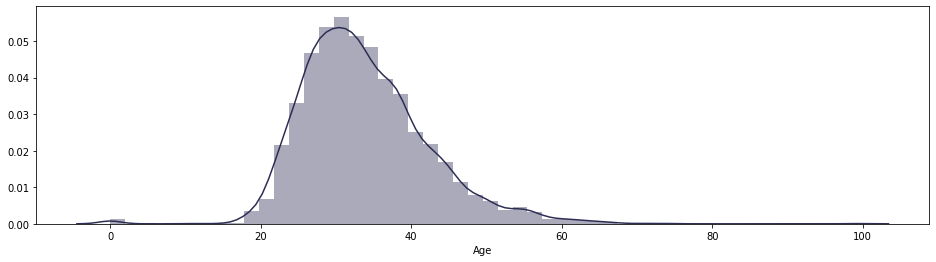

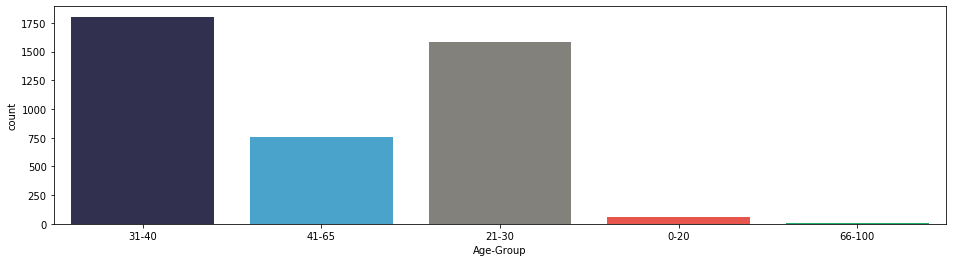

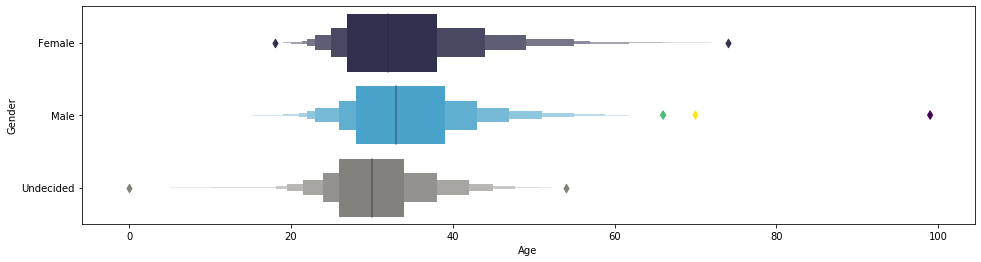

In [4]:
fig = sns.distplot(survey['Age']);    
showFigure(fig)    
fig = sns.countplot(x='Age-Group', data=survey)    
showFigure(fig)
fig = sns.boxenplot(x='Age', y='Gender', data=survey)
showFigure(fig)

### It can be seen that most respondents involved in the survey are between the ages 20-40.

### For further data analysis the count plots of the categorical data are studied. 

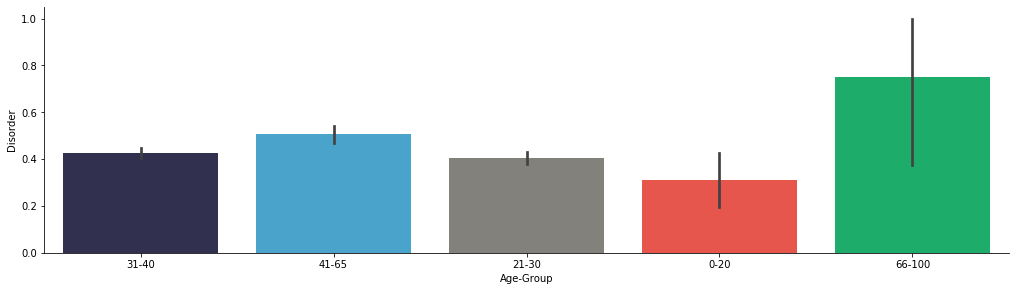

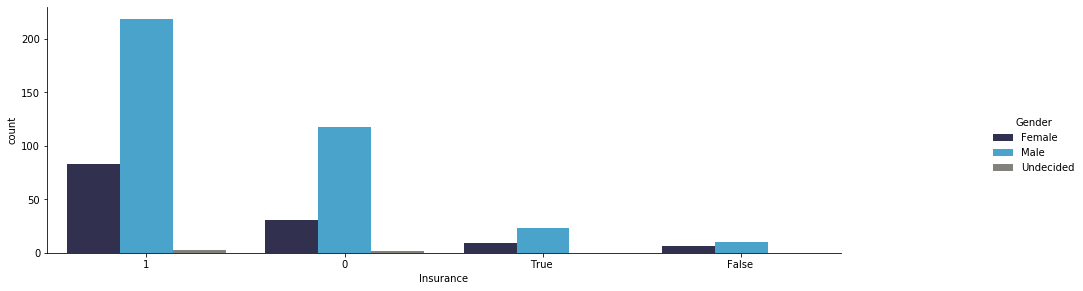

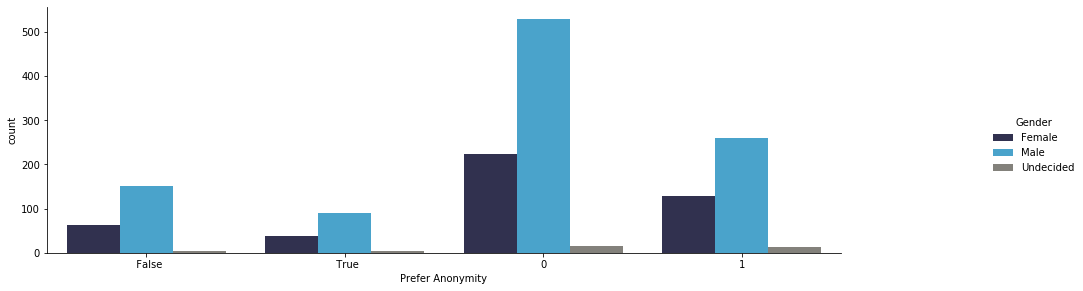

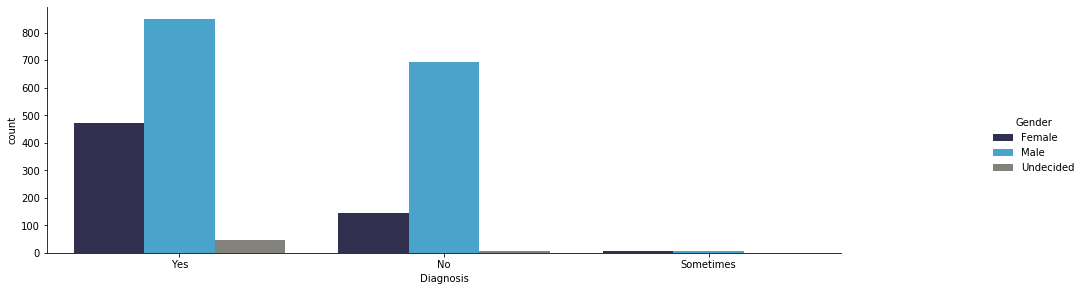

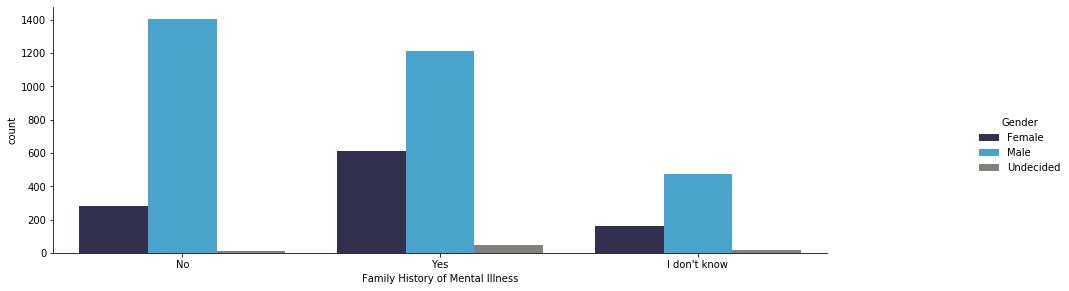

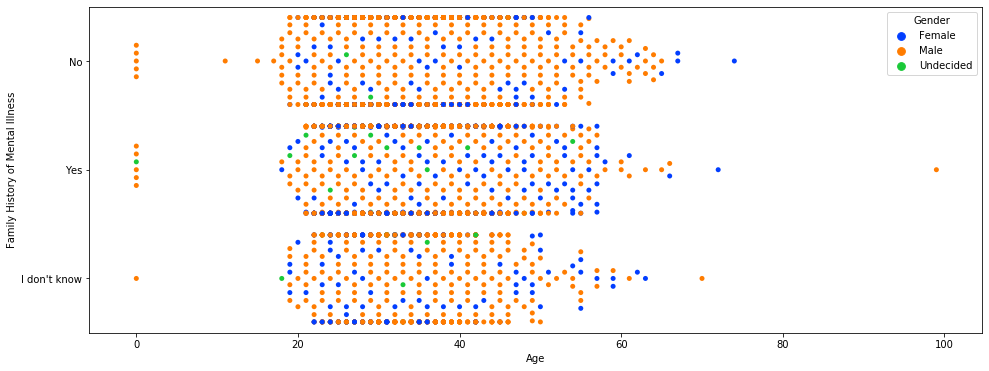

In [5]:
fig = sns.catplot(x='Age-Group', y='Disorder', kind="bar", data=survey)
showFigure(fig)
fig = sns.catplot(x='Insurance', kind="count", hue='Gender', data=survey)
showFigure(fig)
fig = sns.catplot(x='Prefer Anonymity', kind="count", hue='Gender', data=survey)
showFigure(fig)
fig = sns.catplot(x='Diagnosis', kind="count", hue='Gender', data=survey)
showFigure(fig)
fig = sns.catplot(x='Family History of Mental Illness', kind="count", hue='Gender', data=survey)
showFigure(fig)
fig = sns.swarmplot(x='Age', y='Family History of Mental Illness', hue='Gender',  palette="bright", data=survey)
showFigure(fig, y=6)

### The data shows some interesting trends :
#### 1. Since a large number of responses are from USA or developed countries, most respondents have an insurance that covers some issues related to mental health.
#### 2. Anonymity during discussions is desired but it is not really a discriminating factor when it comes to seeking help for mental health condition(s).
#### 3. A large number of respondents report to having some mental health disorder or any other health condition like PTSD, etc.
#### 4. More females report to having some history of mental health illness in the family.
#### 5. People who do not identiffy themselves with either the male or female sex group have a much higher incidence of mental health disorder.

### Working for a bigger company or smaller company may have a role in how mental health issues are observed and treated.

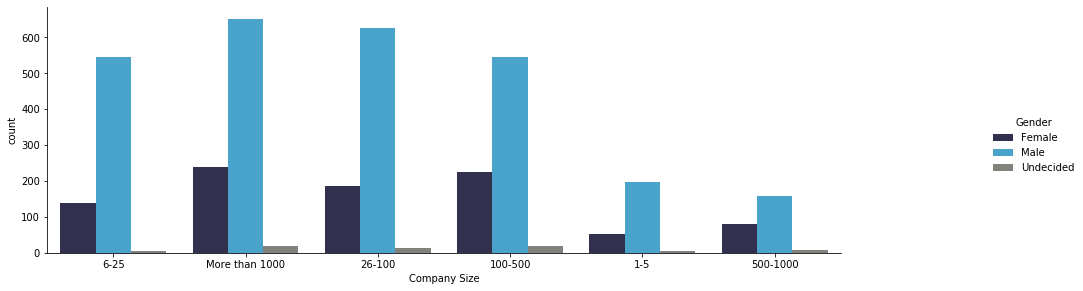

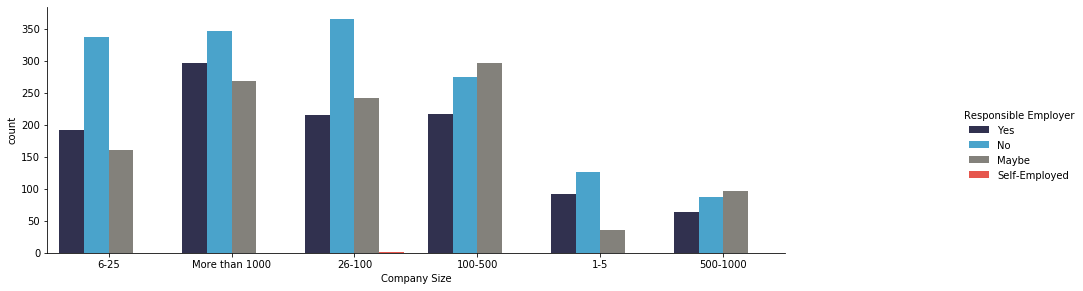

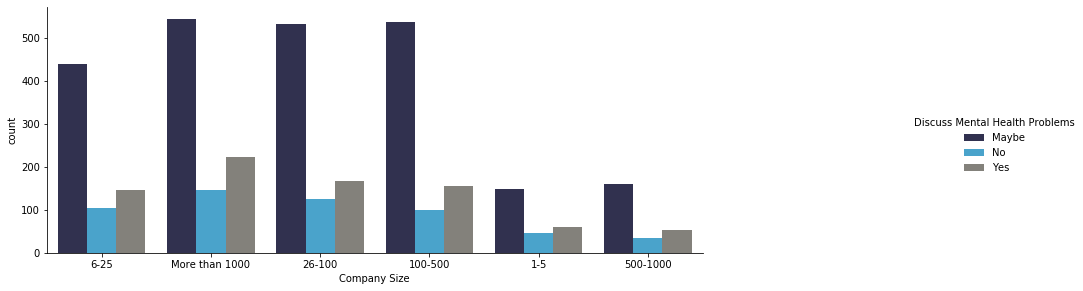

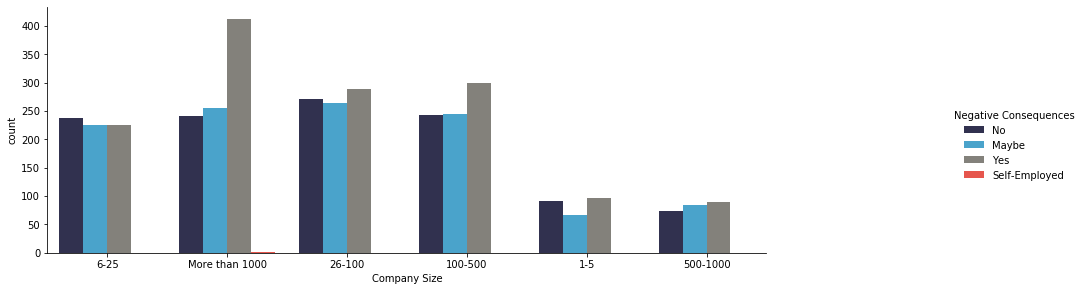

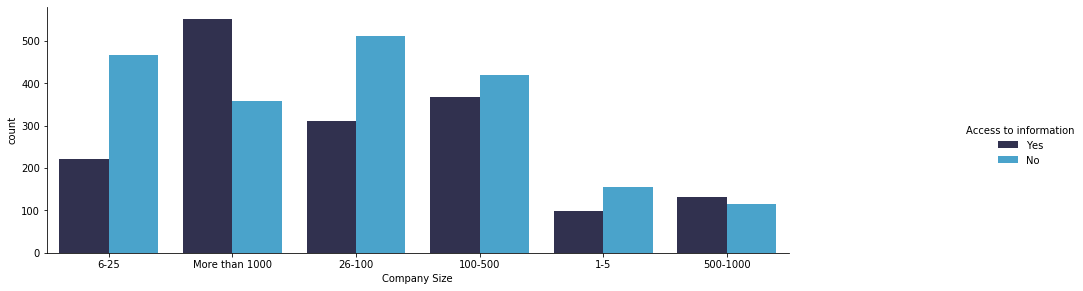

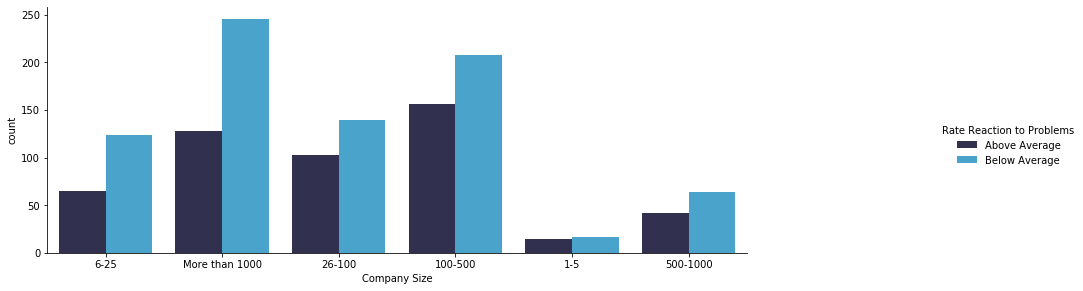

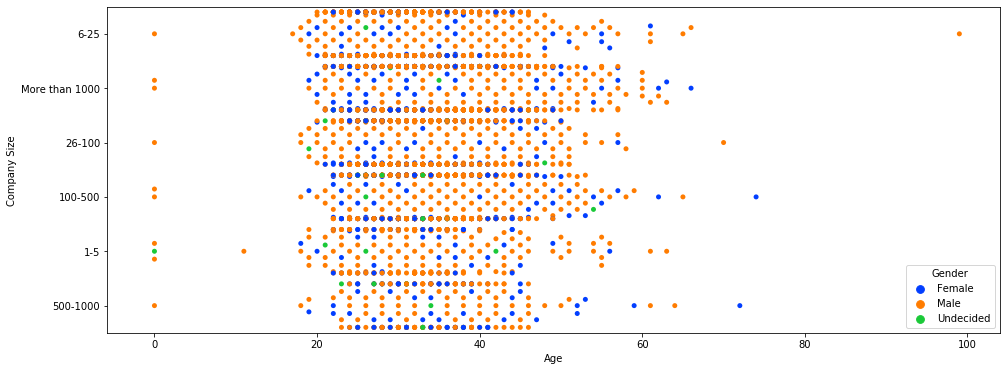

In [6]:
fig = sns.catplot(x='Company Size', hue='Gender', data=survey, kind="count")
showFigure(fig)
fig = sns.catplot(x='Company Size', hue='Responsible Employer', data=survey, kind="count")
showFigure(fig)
fig = sns.catplot(x='Company Size', hue='Discuss Mental Health Problems', data=survey, kind="count")
showFigure(fig)
fig = sns.catplot(x='Company Size', hue='Negative Consequences', data=survey, kind="count")
showFigure(fig)
fig = sns.catplot(x='Company Size', hue='Access to information', data=survey, kind="count")
showFigure(fig)
fig = sns.catplot(x='Company Size', hue='Rate Reaction to Problems', data=survey, kind="count")
showFigure(fig)
fig = sns.swarmplot(x='Age', y='Company Size', hue='Gender', palette="bright", data=survey)
showFigure(fig, y=6)

### Most respondents or workers seem to be dissatisfied with the way mental health issues are treated in their company or workplace.
#### 1. Across all company sizes the respondents feel more can be done.
#### 2. Respondents are still not really sure if bringing up a mental health issue would be a good idea.
#### 3. More respondents are of the view that discussing a mental health issue could bring negative consequences. The problem is more pronounced in larger companies.
#### 4. Smaller companies seem to provide less resources than larger comapnies when it comes to educating about mental health issues.
#### 5. But smaller companies seem to perform better when dealing with mental health issues. 

### Let's explore some data on respondents who have sought treatment for mental health issues.

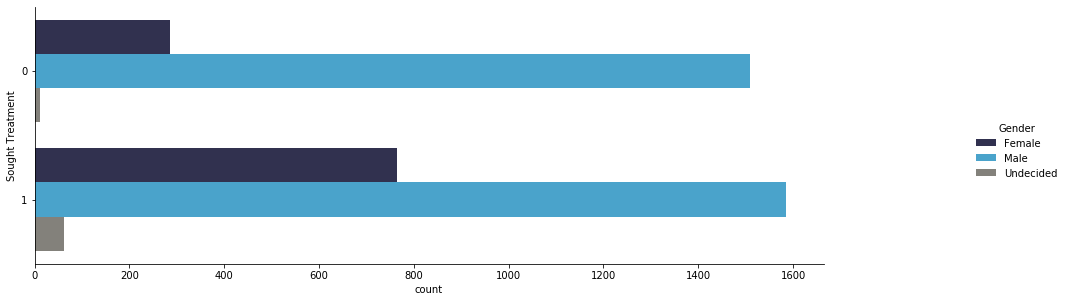

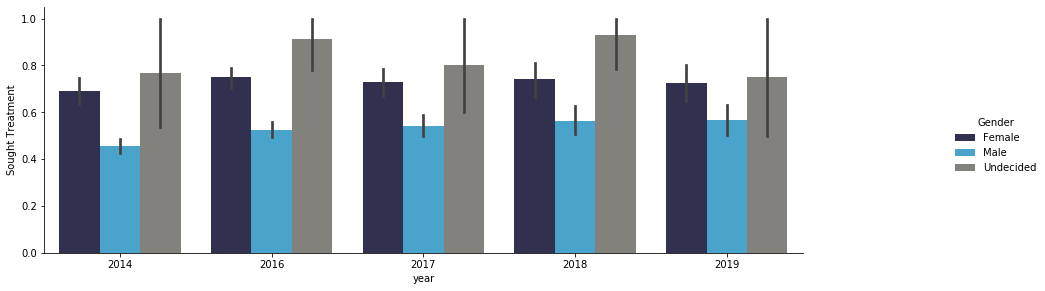

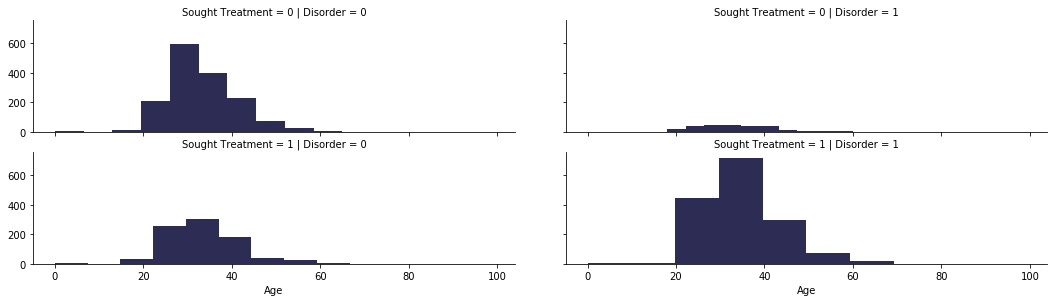

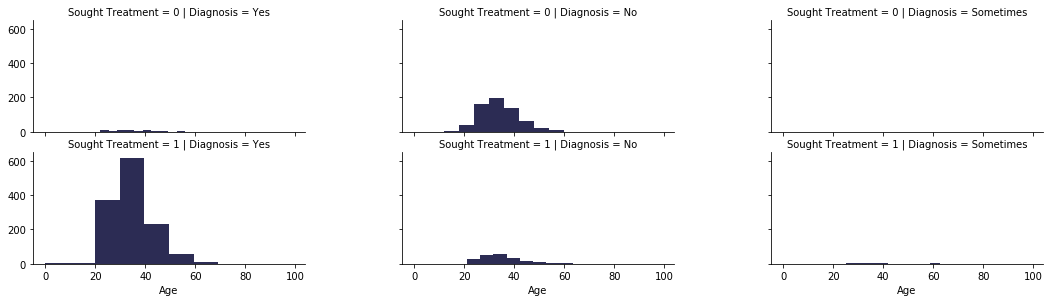

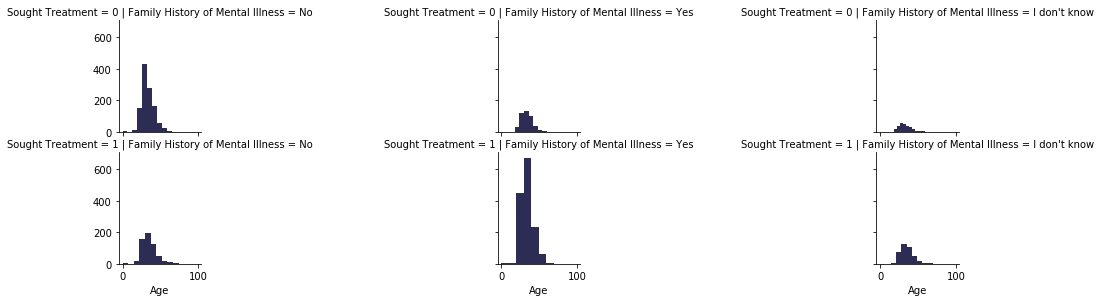

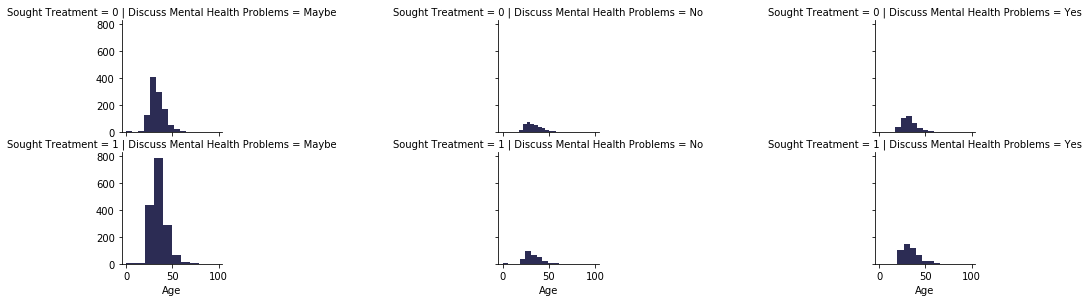

In [7]:
fig = sns.catplot(y='Sought Treatment', hue='Gender', kind="count", data=survey)
showFigure(fig)
fig = sns.catplot(x='year', y='Sought Treatment', hue='Gender', kind="bar", data=survey)
showFigure(fig)
fig = sns.FacetGrid(survey, col='Disorder',  row="Sought Treatment")
fig = fig.map(plt.hist, "Age")
showFigure(fig)
fig = sns.FacetGrid(survey, col='Diagnosis',  row="Sought Treatment")
fig = fig.map(plt.hist, "Age")
showFigure(fig)
fig = sns.FacetGrid(survey, col='Family History of Mental Illness',  row="Sought Treatment")
fig = fig.map(plt.hist, "Age")
showFigure(fig)
fig = sns.FacetGrid(survey, col='Discuss Mental Health Problems',  row="Sought Treatment")
fig = fig.map(plt.hist, "Age")
showFigure(fig)

### Some factors seem to be more prominent when a respondent sought treatment for a mental health issue. Past diagnosis or presence of disorders highten the probability that a respondent may have sought help for mental health issue.

### Other interesting relevation is that a large number of respondents who have sought help for mental health issues are not yet open to discussing about it or are not comfortable doing so.

### More relationship between features is studied. A heatmap of correlation between data is created.

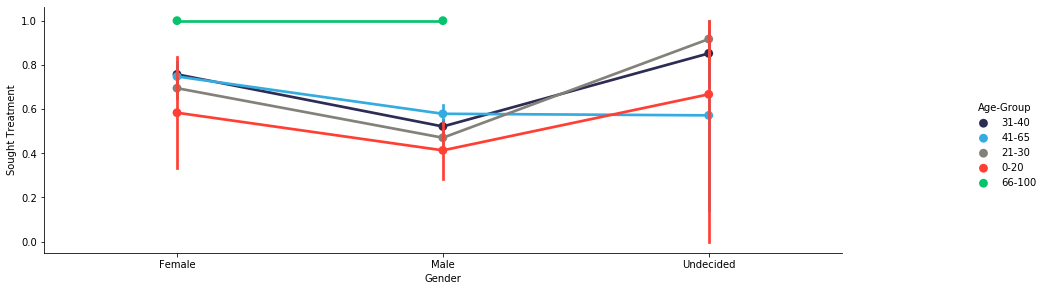

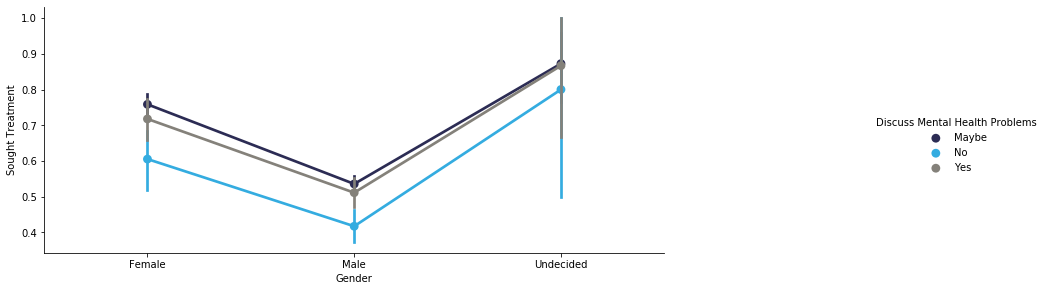

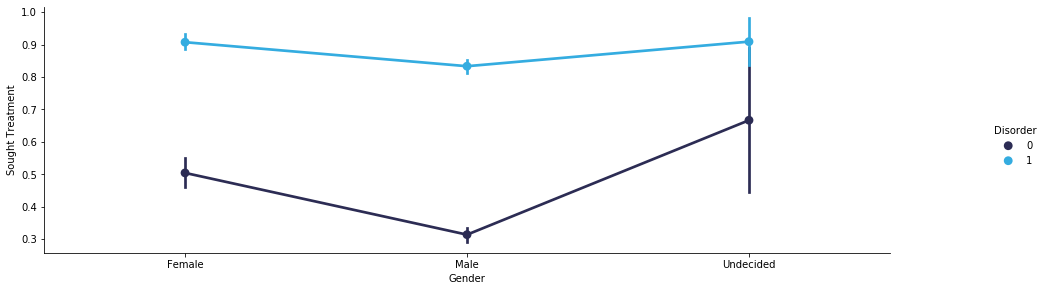

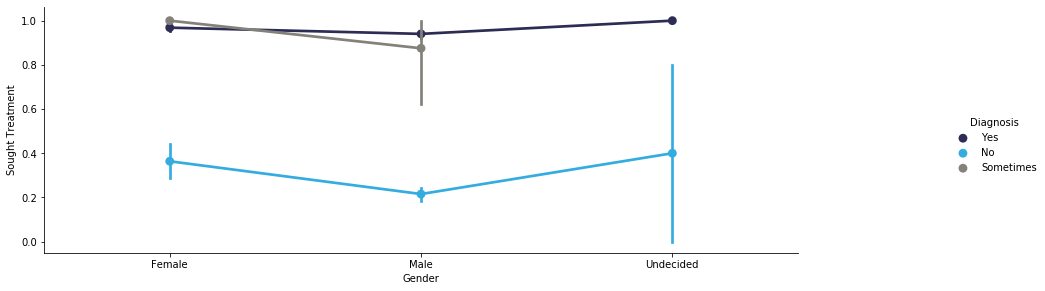

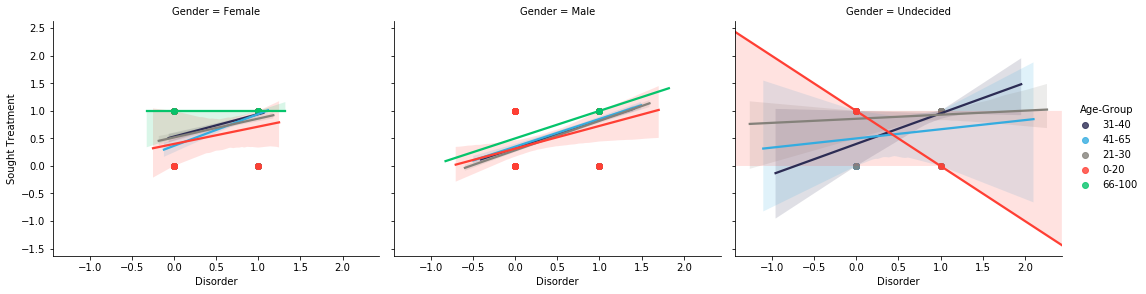

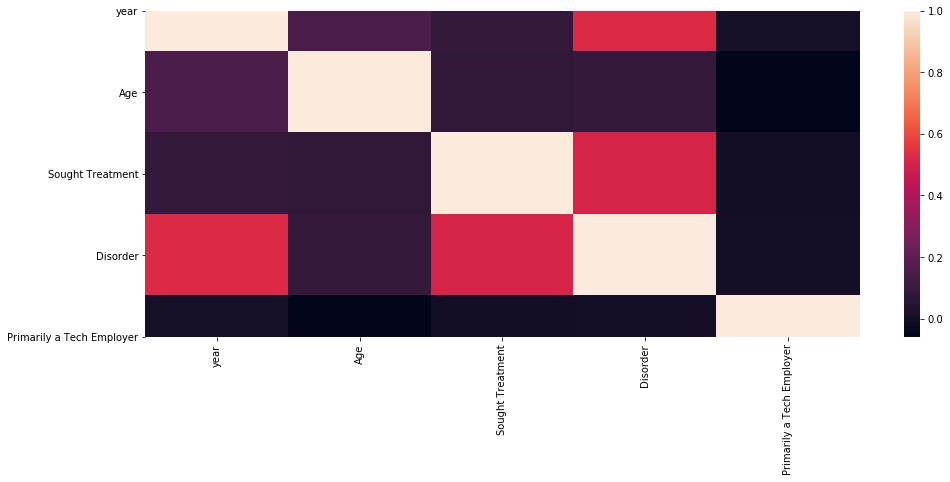

In [8]:
fig = sns.catplot(x='Gender', y='Sought Treatment', hue='Age-Group', kind="point", data=survey)
showFigure(fig)
fig = sns.catplot(x='Gender', y='Sought Treatment', hue='Discuss Mental Health Problems', kind="point", data=survey)
showFigure(fig)
fig = sns.catplot(x='Gender', y='Sought Treatment', hue='Disorder', kind="point", data=survey)
showFigure(fig)
fig = sns.catplot(x='Gender', y='Sought Treatment', hue='Diagnosis', kind="point", data=survey)
showFigure(fig)
fig = sns.lmplot(x='Disorder', y='Sought Treatment', col='Gender', hue='Age-Group', data=survey)
showFigure(fig)

corr=survey.corr()
fig = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
showFigure(fig, y=6)

## Some interesting trends in the data were observed. The respondents who have had a past diagnosis or disorder seem to be more inclined to receive medical help for mental health issues. Still, most respondents feel that more can be done to deal with mental health issues and awareness.  
## There is also a fear that talking about mental health may have negative consequnces on career growth.